# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: MARGARET AYOOLA

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
#import itertools
#import re
#import json
#from typing import Union, Optional, Sequence

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black
# auto reload imports
#%load_ext autoreload
#%autoreload 2

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

###  Answer no 1. Building a machine learning model that predicts the salary.

In [2]:
#loading dataset
df= pd.read_csv("salary.csv")


print(f"shape of df:{df.shape}\n")
df.head(567)

shape of df:(32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
#checking for the type of variables
df.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [4]:
#checking for missing variables
df.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [5]:
#checking the value count of the target variable
df["Salary"].value_counts(normalize=True)



 <=50K    0.759183
 >50K     0.240817
Name: Salary, dtype: float64

<AxesSubplot:>

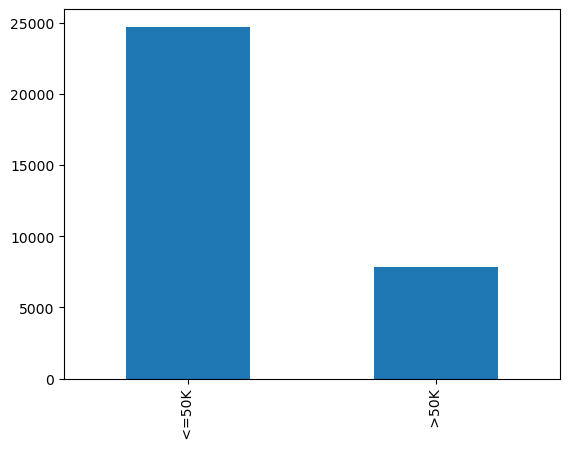

In [6]:
df["Salary"].value_counts().plot(kind= 'bar')

## FEATURE ENGINEERING

## converting the categorical data to numerical data

In [7]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
# Split the data into numeric and categorical data
num_data = df.select_dtypes(include=[int, float])
# Split the data into numeric and categorical data
num_data = df.select_dtypes(include=[int, float])
cat_data = df.select_dtypes(include=["O"])

# Check the shape of the data
num_data.shape, cat_data.shape


((32560, 6), (32560, 9))

In [9]:
num_data.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [10]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [11]:
#checking for unique categories of each categorical columns
for col in cat_data:
    print(col, ': ', len(cat_data[col].unique()), 'labels')

Workclass :  9 labels
Education :  16 labels
Marital_status :  7 labels
Occupation :  15 labels
Relationship :  6 labels
Race :  5 labels
Sex :  2 labels
Country :  42 labels
Salary :  2 labels


In [12]:
#examining the total numbers of column after one hot encoding
pd.get_dummies(df, drop_first = True).shape

(32560, 101)

In [13]:
#finding the top ten most frequent categories  for variable work education
df.Education.value_counts().sort_values(ascending = False). head(16)


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [14]:
edu= [x for x in df.Education.value_counts().sort_values(ascending = False). head(10).index]
edu

[' HS-grad',
 ' Some-college',
 ' Bachelors',
 ' Masters',
 ' Assoc-voc',
 ' 11th',
 ' Assoc-acdm',
 ' 10th',
 ' 7th-8th',
 ' Prof-school']

In [15]:
for label in edu:
    df[label]= np.where(df['Education']== label, 1, 0)
    
df[['Education']+edu].head(20)

,Education,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school
0,Bachelors,0,0,1,0,0,0,0,0,0,0
1,HS-grad,1,0,0,0,0,0,0,0,0,0
2,11th,0,0,0,0,0,1,0,0,0,0
3,Bachelors,0,0,1,0,0,0,0,0,0,0
4,Masters,0,0,0,1,0,0,0,0,0,0
5,9th,0,0,0,0,0,0,0,0,0,0
6,HS-grad,1,0,0,0,0,0,0,0,0,0
7,Masters,0,0,0,1,0,0,0,0,0,0
8,Bachelors,0,0,1,0,0,0,0,0,0,0
9,Some-college,0,1,0,0,0,0,0,0,0,0


In [16]:
#to get the whole set of dummies variable for all the categorical data
def one_hot_top_x(df, variable, top_x_labels):
    #functions to create dummy variables for the most frequent labels
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
        
#read the data again
df= pd.read_csv("salary.csv")

#encoding Education into top 10 most frequent categories
one_hot_top_x(df, 'Education', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0


In [17]:
edu= [x for x in df.Workclass.value_counts().sort_values(ascending = False). head(5).index]

one_hot_top_x(df, 'Workclass', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [18]:
edu= [x for x in df.Marital_status.value_counts().sort_values(ascending = False). head(4).index]

one_hot_top_x(df, 'Marital_status', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [19]:
edu= [x for x in df.Occupation.value_counts().sort_values(ascending = False). head(10).index]

one_hot_top_x(df, 'Occupation', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [20]:
edu= [x for x in df.Relationship.value_counts().sort_values(ascending = False). head(6).index]

one_hot_top_x(df, 'Relationship', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
df.Relationship.value_counts().sort_values(ascending = False). head(16)

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [22]:
edu= [x for x in df.Relationship.value_counts().sort_values(ascending = False). head(6).index]
edu


[' Husband',
 ' Not-in-family',
 ' Own-child',
 ' Unmarried',
 ' Wife',
 ' Other-relative']

In [23]:
df.Race.value_counts().sort_values(ascending = False). head(16)

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [24]:
edu= [x for x in df.Race.value_counts().sort_values(ascending = False). head(6).index]

one_hot_top_x(df, 'Race', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [25]:
df.Country.value_counts().sort_values(ascending = False). head(16)

 United-States         29169
 Mexico                  643
 ?                       583
 Philippines             198
 Germany                 137
 Canada                  121
 Puerto-Rico             114
 El-Salvador             106
 India                   100
 Cuba                     95
 England                  90
 Jamaica                  81
 South                    80
 China                    75
 Italy                    73
 Dominican-Republic       70
Name: Country, dtype: int64

In [26]:
edu= [x for x in df.Country.value_counts().sort_values(ascending = False). head(7).index]

one_hot_top_x(df, 'Country', edu)
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Country_ United-States,Country_ Mexico,Country_ ?,Country_ Philippines,Country_ Germany,Country_ Canada,Country_ Puerto-Rico
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0


**using label encoder for changing the sex into numerical data**

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the Sex variable 
labels = label_encode.fit_transform(df.Sex)
df["sex"]= labels

In [30]:
df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Country_ United-States,Country_ Mexico,Country_ ?,Country_ Philippines,Country_ Germany,Country_ Canada,Country_ Puerto-Rico,sex
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
#dropping the categorical variables that has been encoded into numerical variables 
vars_to_drop= ["Occupation","Race","Sex", "Relationship","Country","Workclass","Marital_status","Education",]
df.drop(columns =  vars_to_drop, inplace = True)

df.shape

(32560, 55)

In [32]:
#load the label encoder function
label_encode= LabelEncoder()
#label encoding of the TARGET variable 
labels = label_encode.fit_transform(df.Salary)
df["target"]= labels
df.head()
# 0 == <=50, 1== >50

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Salary,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Country_ United-States,Country_ Mexico,Country_ ?,Country_ Philippines,Country_ Germany,Country_ Canada,Country_ Puerto-Rico,sex,target
0,50,83311,13,0,0,13,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,38,215646,9,0,0,40,<=50K,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,53,234721,7,0,0,40,<=50K,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,28,338409,13,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,<=50K,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [33]:
df["target"].value_counts()

0    24719
1     7841
Name: target, dtype: int64

In [34]:
df.groupby('target').mean()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Country_ United-States,Country_ Mexico,Country_ ?,Country_ Philippines,Country_ Germany,Country_ Canada,Country_ Puerto-Rico,sex
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,36.783648,190345.429467,9.594927,148.670537,53.145071,38.840163,0.357053,0.238845,0.126745,0.030907,0.041304,0.045107,0.032445,0.035236,0.024516,0.006190,0.717383,0.073506,0.059711,0.066548,0.038189,0.335127,0.412274,0.161010,0.038796,0.092277,0.128241,0.084874,0.131963,0.107893,0.127756,0.070877,0.066831,0.051661,0.051944,0.294308,0.301307,0.202314,0.130588,0.033294,0.038189,0.837332,0.110725,0.030867,0.011125,0.009952,0.889923,0.024677,0.017679,0.005542,0.003762,0.003317,0.004126,0.611958
1,44.249841,188005.000000,11.611657,4006.142456,195.001530,45.473026,0.213621,0.176891,0.283255,0.122306,0.046040,0.007652,0.033797,0.007907,0.005101,0.053947,0.632955,0.092335,0.078689,0.024359,0.045020,0.853463,0.062620,0.059049,0.008417,0.237087,0.118480,0.250988,0.064660,0.125367,0.017472,0.031884,0.024359,0.040811,0.010968,0.754751,0.109170,0.008545,0.027803,0.095013,0.004719,0.907665,0.049356,0.035200,0.004591,0.003188,0.914552,0.004209,0.018620,0.007780,0.005612,0.004974,0.001530,0.849637


In [36]:
#dropping the Salary variables since it has been encoded
vars_to_drop= [ "Salary"]
df.drop(columns =  vars_to_drop, inplace = True)

df.shape


(32560, 55)

In [37]:
df.dtypes

Age                                   int64
Final_weight                          int64
Education_num                         int64
Capital_gain                          int64
Capital_loss                          int64
Hours_per_week                        int64
Education_ HS-grad                    int32
Education_ Some-college               int32
Education_ Bachelors                  int32
Education_ Masters                    int32
Education_ Assoc-voc                  int32
Education_ 11th                       int32
Education_ Assoc-acdm                 int32
Education_ 10th                       int32
Education_ 7th-8th                    int32
Education_ Prof-school                int32
Workclass_ Private                    int32
Workclass_ Self-emp-not-inc           int32
Workclass_ Local-gov                  int32
Workclass_ ?                          int32
Workclass_ State-gov                  int32
Marital_status_ Married-civ-spouse    int32
Marital_status_ Never-married   

In [38]:
df["target"].value_counts()

0    24719
1     7841
Name: target, dtype: int64

## features selection 

**using univiarate selection technique**

In [41]:
#init the constants
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "target"

In [42]:
# independent features
X = df.drop(columns=TARGET)

# Target variable
y = df[TARGET]

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df
X
y


0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: target, Length: 32560, dtype: int32

In [45]:
bestfeatures = SelectKBest(score_func = chi2, k= 'all')
fit = bestfeatures.fit(X,y)

In [46]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [47]:
#concat two dataframe for better visualization
featurescores = pd.concat([dfcolumns,dfscores], axis = 1)
featurescores.columns = ['variables', 'score'] #naming the dataframe columns

In [48]:
featurescores

,variables,score
0,Age,8.600737e+03
1,Final_weight,1.718124e+05
2,Education_num,2.401748e+03
3,Capital_gain,8.219773e+07
4,Capital_loss,1.372049e+06
5,Hours_per_week,6.476435e+03
6,Education_ HS-grad,3.797233e+02
7,Education_ Some-college,1.020358e+02
8,Education_ Bachelors,8.867651e+02
9,Education_ Masters,9.397115e+02


In [49]:
#printing the top 10 best features
print(featurescores.nlargest(100, 'score'))

                             variables         score
3                         Capital_gain  8.219773e+07
4                         Capital_loss  1.372049e+06
1                         Final_weight  1.718124e+05
0                                  Age  8.600737e+03
5                       Hours_per_week  6.476435e+03
21  Marital_status_ Married-civ-spouse  3.477193e+03
35               Relationship_ Husband  3.114654e+03
2                        Education_num  2.401748e+03
22       Marital_status_ Never-married  2.218338e+03
37             Relationship_ Own-child  1.435936e+03
27         Occupation_ Exec-managerial  1.315375e+03
25          Occupation_ Prof-specialty  9.817447e+02
9                   Education_ Masters  9.397115e+02
8                 Education_ Bachelors  8.867651e+02
36         Relationship_ Not-in-family  8.616616e+02
15              Education_ Prof-school  7.674771e+02
30           Occupation_ Other-service  7.154342e+02
38             Relationship_ Unmarried  5.9422

In [61]:
#printing the top 30 best features
print(featurescores.nsmallest(40, 'score'))

                        variables       score
48                     Country_ ?    0.294612
12          Education_ Assoc-acdm    0.332056
10           Education_ Assoc-voc    3.145419
43       Race_ Asian-Pac-Islander    3.501817
46         Country_ United-States    4.030638
51                Country_ Canada    4.395781
26       Occupation_ Craft-repair    4.505788
50               Country_ Germany    4.838033
49           Country_ Philippines    4.899989
20           Workclass_ State-gov    6.972203
52           Country_ Puerto-Rico   11.457626
33   Occupation_ Transport-moving   14.286323
29              Occupation_ Sales   16.214053
44       Race_ Amer-Indian-Eskimo   26.605590
17    Workclass_ Self-emp-not-inc   27.042694
45                    Race_ Other   32.717098
18           Workclass_ Local-gov   33.352191
41                    Race_ White   34.470250
16             Workclass_ Private   60.873776
7         Education_ Some-college  102.035831
14             Education_ 7th-8th 

In [60]:
df.shape

(32560, 55)

**features selection using Correlation Matrix Heatmap technique**

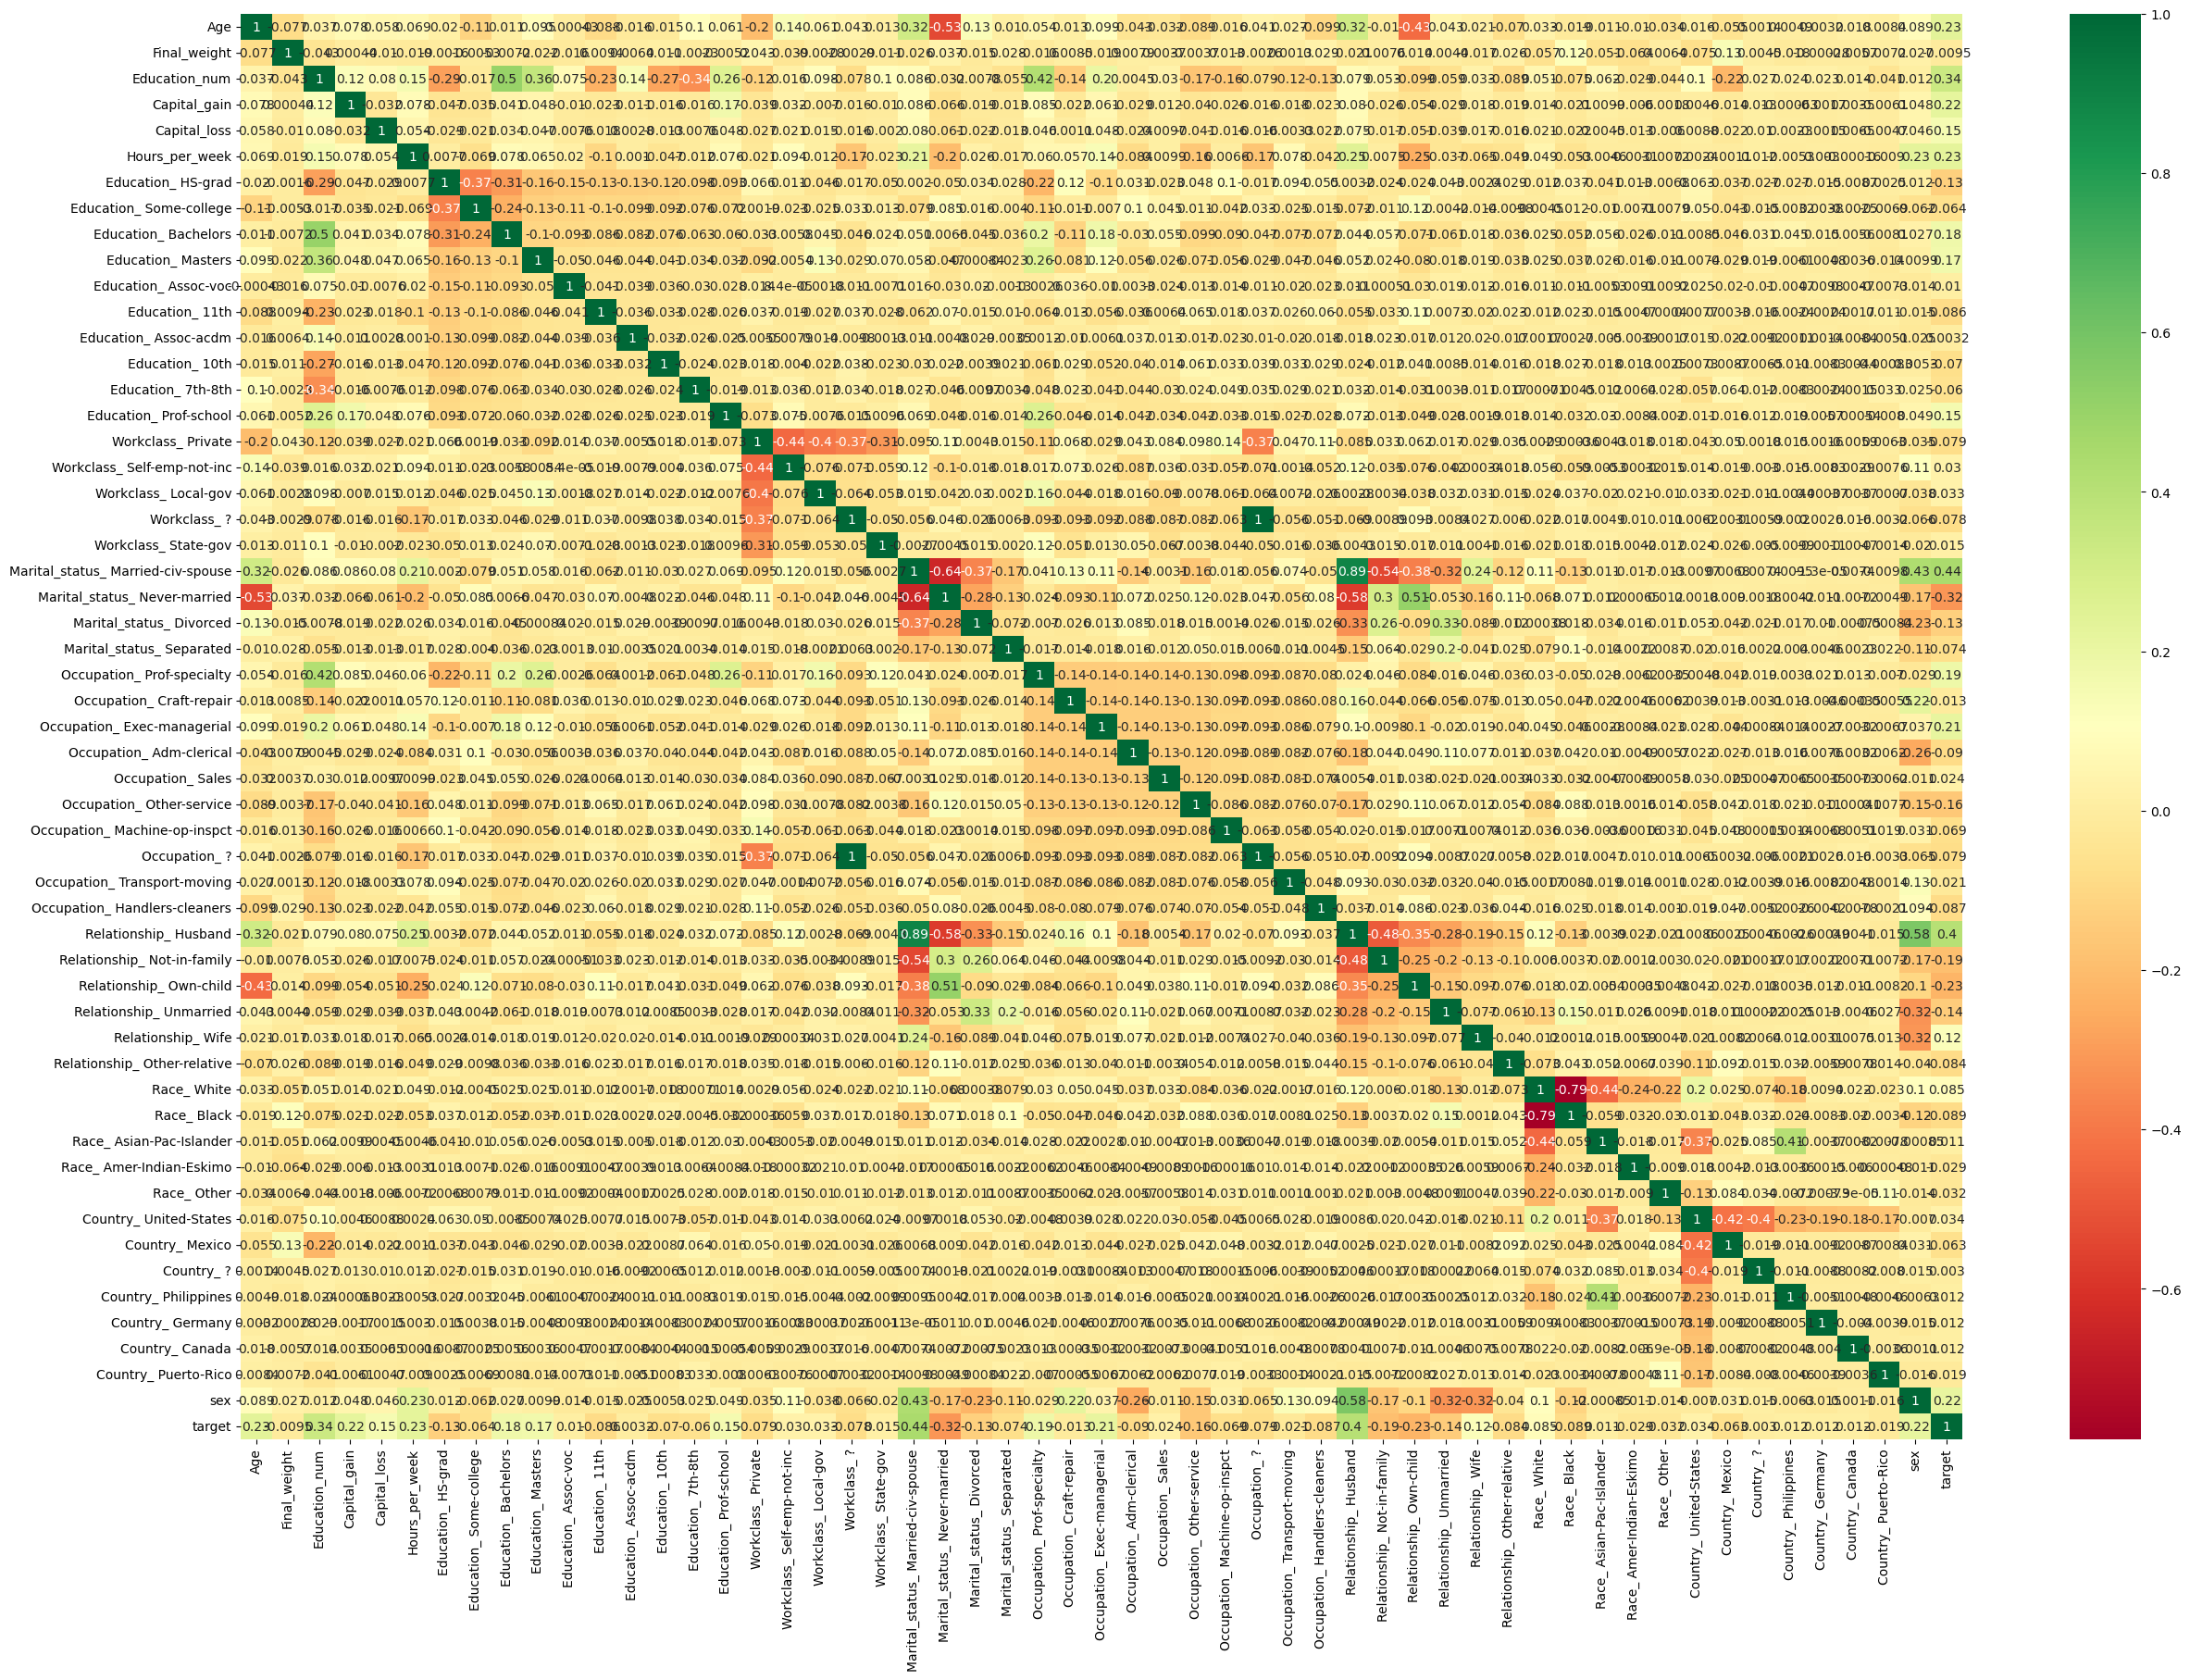

In [58]:
#getting correlations of each features in the dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (30,20))
#plot map
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

In [62]:
df.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Country_ United-States,Country_ Mexico,Country_ ?,Country_ Philippines,Country_ Germany,Country_ Canada,Country_ Puerto-Rico,sex,target
0,50,83311,13,0,0,13,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,38,215646,9,0,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,53,234721,7,0,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [63]:
#getting the statistical measures
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week,Education_ HS-grad,Education_ Some-college,Education_ Bachelors,Education_ Masters,Education_ Assoc-voc,Education_ 11th,Education_ Assoc-acdm,Education_ 10th,Education_ 7th-8th,Education_ Prof-school,Workclass_ Private,Workclass_ Self-emp-not-inc,Workclass_ Local-gov,Workclass_ ?,Workclass_ State-gov,Marital_status_ Married-civ-spouse,Marital_status_ Never-married,Marital_status_ Divorced,Marital_status_ Separated,Occupation_ Prof-specialty,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Adm-clerical,Occupation_ Sales,Occupation_ Other-service,Occupation_ Machine-op-inspct,Occupation_ ?,Occupation_ Transport-moving,Occupation_ Handlers-cleaners,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Relationship_ Other-relative,Race_ White,Race_ Black,Race_ Asian-Pac-Islander,Race_ Amer-Indian-Eskimo,Race_ Other,Country_ United-States,Country_ Mexico,Country_ ?,Country_ Philippines,Country_ Germany,Country_ Canada,Country_ Puerto-Rico,sex,target
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.322512,0.223925,0.164435,0.052918,0.042445,0.036087,0.032770,0.028655,0.019840,0.017690,0.697052,0.078041,0.064281,0.056388,0.039834,0.459951,0.328071,0.136456,0.031480,0.127150,0.125891,0.124877,0.115756,0.112101,0.101198,0.061486,0.056603,0.049048,0.042076,0.405190,0.255037,0.155651,0.105835,0.048157,0.030129,0.854269,0.095946,0.031910,0.009552,0.008323,0.895854,0.019748,0.017905,0.006081,0.004208,0.003716,0.003501,0.669195,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.467445,0.416879,0.370675,0.223873,0.201605,0.186510,0.178038,0.166837,0.139453,0.131826,0.459540,0.268239,0.245257,0.230673,0.195572,0.498401,0.469518,0.343277,0.174615,0.333146,0.331731,0.330585,0.319936,0.315495,0.301595,0.240224,0.231086,0.215971,0.200766,0.490936,0.435889,0.362530,0.307632,0.214102,0.170945,0.352842,0.294522,0.175764,0.097266,0.090852,0.305455,0.139136,0.132610,0.077745,0.064731,0.060848,0.059068,0.470510,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

## Model Selection 

In [66]:
print(X)

       Age  Final_weight  Education_num  Capital_gain  Capital_loss  \
0       50         83311             13             0             0   
1       38        215646              9             0             0   
2       53        234721              7             0             0   
3       28        338409             13             0             0   
4       37        284582             14             0             0   
...    ...           ...            ...           ...           ...   
32555   27        257302             12             0             0   
32556   40        154374              9             0             0   
32557   58        151910              9             0             0   
32558   22        201490              9             0             0   
32559   52        287927              9         15024             0   

       Hours_per_week  Education_ HS-grad  Education_ Some-college  \
0                  13                   0                        0   
1      

In [67]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: target, Length: 32560, dtype: int32


In [102]:
x= np.asarray(X)
y= np.asarray(y)

In [105]:
print(x)
print(y)

[[    50  83311     13 ...      0      0      1]
 [    38 215646      9 ...      0      0      1]
 [    53 234721      7 ...      0      0      1]
 ...
 [    58 151910      9 ...      0      0      0]
 [    22 201490      9 ...      0      0      1]
 [    52 287927      9 ...      0      0      0]]
[0 0 0 ... 0 0 1]


In [70]:
#data standardization
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [71]:
scaler.fit(x)

StandardScaler()

In [72]:
standardized_data= scaler.transform(x)

In [73]:
print(standardized_data)

[[ 0.83709708 -1.0087417   1.13477863 ... -0.06107436 -0.05927504
   0.70308748]
 [-0.04264043  0.24504633 -0.42002663 ... -0.06107436 -0.05927504
   0.70308748]
 [ 1.05703146  0.42576955 -1.19742926 ... -0.06107436 -0.05927504
   0.70308748]
 ...
 [ 1.42358875 -0.3588108  -0.42002663 ... -0.06107436 -0.05927504
  -1.42229812]
 [-1.21562378  0.11092744 -0.42002663 ... -0.06107436 -0.05927504
   0.70308748]
 [ 0.98372     0.92986178 -0.42002663 ... -0.06107436 -0.05927504
  -1.42229812]]


In [75]:
x = standardized_data
y = df[TARGET]

In [76]:
#import of packages
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [77]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
#list of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(),  RandomForestClassifier(random_state = RANDOM_STATE), SVC(kernel = 'linear')]

In [84]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv= 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)
        
        print('Cross Validation accuracies for the', model , '=', cv_score)
        print('Accuracy score of the ', model, '=', mean_accuracy, '%')
        print('---------------------------------------------------------------------------------')
        

In [85]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.84536241 0.84643735 0.85150491 0.85426904 0.85058354]
Accuracy score of the  LogisticRegression(max_iter=1000) = 84.96 %
---------------------------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.82478501 0.82140663 0.82570639 0.83108108 0.82662776]
Accuracy score of the  KNeighborsClassifier() = 82.59 %
---------------------------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=123) = [0.85350123 0.84920147 0.85273342 0.85872236 0.85488329]
Accuracy score of the  RandomForestClassifier(random_state=123) = 85.38 %
---------------------------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.84244472 0.84797297 0.8507371  0.85257985 0.85012285]
Accuracy score of the  SVC(kernel='linear') = 84.88 %
----

**inference: for my Salary dataset the RandomForestClassifier has the highest accuracy rate, hence i would be using the  RandomForestClassifier model**

**splitting the data into train dataset and test dataset**

In [87]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=TEST_SIZE, stratify = y, random_state=RANDOM_STATE, 
)

x.shape, x_train.shape, x_test.shape

((32560, 54), (26048, 54), (6512, 54))

## Building the model
1. instantiate
2. fit(using training data)
3. make prediction (using test data)

In [88]:
#instantiating
random_forest_model = RandomForestClassifier(random_state = RANDOM_STATE)

#fitting
random_forest_model.fit(x_train, y_train)

#predicting
y_pred_1= random_forest_model.predict(x_test)
random_forest_model

RandomForestClassifier(random_state=123)

In [90]:
def create_result_dataframe (*, y_true: np.ndarray, y_pred:np.ndarray) -> pd.DataFrame:
    
    """this returns a Dataframe containing the true, predicted and error values"""
    #convert prediction to dataframe
    result = pd.DataFrame() #empty df
    
    result["Actual_score"] = y_true
    result["Predicted_score"] = y_pred
    result["Error_in_predictions"] = result["Actual_score"] - result["Predicted_score"]
    
    return result

In [99]:
result = create_result_dataframe(y_true = y_test, y_pred = y_pred_1)
result.sample(n=50,random_state = RANDOM_STATE)

,Actual_score,Predicted_score,Error_in_predictions
11799,1,0,1
31733,0,0,0
20111,0,0,0
25537,0,1,-1
28705,1,0,1
8012,1,1,0
24213,0,0,0
20427,0,0,0
32,0,0,0
12803,1,0,1


In [97]:
def evaluate_model(*, y_true: np.ndarray, y_pred: np.ndarray) -> str:
    """This is used to evaluate a regressor."""
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

    # Mean Squared Error (The lower, the better)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=True)

    # Root Mean Squared Error (The lower, the better)
    # Remember to use squared=False
    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)

    # Mean Absolute Error (The lower, the better)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)

    # R Squared (The higher, the better. Max (best) value is 1)
    R2 = r2_score(y_true=y_true, y_pred=y_pred)

    result_str = (
        "==================== Evaluation Metrics ===================="
        f"\nMean Squared Error (The lower, the better!): {round(mse, 3)}"
        f"\nRoot Mean Squared Error (The lower, the better!): {round(rmse, 3)}"
        f"\nMean Absolute Error (The lower, the better!): {round(mae, 3)}"
        "\n==========================================================="
        f"\nR Squared (The higher, the better!): {round(R2, 3)} "
    )

    return result_str

## Qs 2. Evaluate the performance of your model using at least three (3) performance metrics

## Model evaluation


Accuracy score


In [98]:
print(evaluate_model(y_true = y_test, y_pred = y_pred_1))

==================== Evaluation Metrics ====================
Mean Squared Error (The lower, the better!): 0.149
Root Mean Squared Error (The lower, the better!): 0.386
Mean Absolute Error (The lower, the better!): 0.149
R Squared (The higher, the better!): 0.186 


## making a predictive system

In [118]:
input_data= (50,83311,13,0,0,13,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1)



#converting the input_data to numpy array

input_data_to_numpy_array= np.asarray(input_data)

#reshapening the array

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

#standardise the input_data


std_data = scaler.transform(input_data_reshaped)

print(std_data)


input_data_df = pd.DataFrame(std_data)

prediction = random_forest_model.predict(input_data_df)
print(prediction)

[[ 0.83709708 -1.0087417   1.13477863 -0.14591373 -0.21666301 -2.22212013
  -0.68995763 -0.53715487  2.25420373 -0.23637774 -0.21053771 -0.19348971
  -0.18406669 -0.17175596 -0.14227403 -0.13419763 -1.51686919  3.43712857
  -0.26210166 -0.24445418 -0.20368294  1.08357985 -0.69875106 -0.39751513
  -0.18028746 -0.3816701  -0.37950184  2.64723821 -0.36181344 -0.35532224
  -0.33554707 -0.25595851 -0.24494765 -0.22710722 -0.20958133  1.21160036
  -0.58510536 -0.42935363 -0.34403822 -0.22493044 -0.17625251  0.41302713
  -0.32577377 -0.18155482 -0.09820239 -0.09161305  0.34095976 -0.14193662
  -0.13502538 -0.07821948 -0.06500304 -0.06107436 -0.05927504  0.70308748]]
[0]


In [119]:
if (prediction[0] == 0):
    print("the person makes less 50K a year.")
else:
    print ("the person makes over 50K a year.")

the person makes less 50K a year.


In [ ]:
if (prediction[0] == 0):
    print("the person makes less 50K a year.")
else:
    print ("the person makes over 50K a year.")

In [121]:
input_data= (52,287927,9,15024,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0)


#converting the input_data to numpy array

input_data_to_numpy_array= np.asarray(input_data)

#reshapening the array

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

#standardise the input_data


std_data = scaler.transform(input_data_reshaped)

print(std_data)


input_data_df = pd.DataFrame(std_data)

prediction = random_forest_model.predict(input_data_df)
print(prediction)


[[ 0.98372     0.92986178 -0.42002663  1.88840054 -0.21666301 -0.03542999
   1.44936437 -0.53715487 -0.44361563 -0.23637774 -0.21053771 -0.19348971
  -0.18406669 -0.17175596 -0.14227403 -0.13419763 -1.51686919 -0.29094053
  -0.26210166 -0.24445418 -0.20368294 -0.92286692  1.43112485 -0.39751513
  -0.18028746 -0.3816701  -0.37950184 -0.37775218  2.76385533 -0.35532224
  -0.33554707 -0.25595851 -0.24494765 -0.22710722 -0.20958133 -0.82535465
  -0.58510536 -0.42935363 -0.34403822 -0.22493044  5.67367798 -2.42114848
   3.06961483 -0.18155482 -0.09820239 -0.09161305 -2.93289743  7.04539822
  -0.13502538 -0.07821948 -0.06500304 -0.06107436 -0.05927504 -1.42229812]]
[1]


In [122]:
if (prediction[0] == 0):
    print("the person makes less 50K a year.")
else:
    print ("the person makes over 50K a year.")

the person makes over 50K a year.
